In [1]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.losses import SparseCategoricalCrossentropy
from matplotlib import pyplot as plt

Učitati skup podataka $cifar10$ i za obučavanje koristiti prvih $10000$ slika iz skupa za obučavanje, a za testiranje koristiti prvih $1000$ slika iz skupa za testiranje.

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:1000]
y_test = y_test[:1000]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# plt.title(y_train[0])
# plt.imshow(X_train[0])
# plt.show()

(10000, 32, 32, 3)
(10000, 1)
(1000, 32, 32, 3)
(1000, 1)


Izvršiti normalizaciju piksela i eventualno promeniti kodiranje ciljne promenljive.

In [3]:
import keras.backend as K

img_size = X_train.shape[1]

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_size, img_size)
    X_test = X_test.reshape(X_test.shape[0], 3, img_size, img_size)
else:
    X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 3)
    X_test = X_test.reshape(X_test.shape[0], img_size, img_size, 3)
    
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#print(X_train[0])
X_train = X_train / 255
X_test = X_test / 255
#print(X_train[0])

numClasses = 10
y_train = to_categorical(y_train, numClasses)
y_test = to_categorical(y_test, numClasses)

(10000, 32, 32, 3)
(10000, 1)
(1000, 32, 32, 3)
(1000, 1)


Napraviti konvolutivnu neuronsku mrežu sa sledećom arhitekturom:
- Konvolutivni sloj sa $32$ filtera veličine $3 \times 3$ i ReLu aktivacionom funkcijom
- Konvolutivni sloj sa $32$ filtera veličine $3 \times 3$ i ReLu aktivacionom funkcijom
- Agregacioni sloj sa veličinom prozora $2 \times 2$
- Konvolutivni sloj sa $64$ filtera veličine $3 \times 3$ i ReLu aktivacionom funkcijom
- Konvolutivni sloj sa $64$ filtera veličine $3 \times 3$ i ReLu aktivacionom funkcijom
- Agregacioni sloj sa veličinom prozora $2 \times 2$
- Sloj za ravnanje (Flatten)
- Potpuno povezani sloj sa $64$ neurona i ReLu aktivacionom funkcijom
- Potpuno povezani sloj sa brojem neurona jednakim broju klasa i softmax aktivacionom funkcijom

In [4]:
model = Sequential()

input_shape = X_train.shape[1:]

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=numClasses, activation='softmax'))          
          
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

Obučiti model - postaviti veličinu paketa (batch size) na $64$, broj epoha na $10$.

Iskoristiti $20\%$ trening podataka za validaciju.

In [5]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 5s 39ms/step - loss: 2.0230 - accuracy: 0.2406 - val_loss: 1.7954 - val_accuracy: 0.3425
Epoch 2/10
125/125 [==============================] - 5s 39ms/step - loss: 1.6670 - accuracy: 0.3950 - val_loss: 1.5898 - val_accuracy: 0.4205
Epoch 3/10
125/125 [==============================] - 5s 38ms/step - loss: 1.5091 - accuracy: 0.4512 - val_loss: 1.4479 - val_accuracy: 0.4640
Epoch 4/10
125/125 [==============================] - 5s 39ms/step - loss: 1.3867 - accuracy: 0.4980 - val_loss: 1.3534 - val_accuracy: 0.5020
Epoch 5/10
125/125 [==============================] - 5s 38ms/step - loss: 1.2923 - accuracy: 0.5330 - val_loss: 1.3437 - val_accuracy: 0.5060
Epoch 6/10
125/125 [==============================] - 5s 38ms/step - loss: 1.2346 - accuracy: 0.5512 - val_loss: 1.3381 - val_accuracy: 0.5195
Epoch 7/10
125/125 [==============================] - 5s 38ms/step - loss: 1.1402 - accuracy: 0.5946 - val_loss: 1.2798 - val_accuracy: 0.5315

Nacrtati grafik promene funkcije greške kroz epohe na skupu za obučavanje i za validaciju.

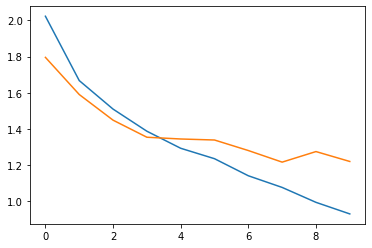

In [9]:
plt.plot(range(10), history.history['loss'])
plt.plot(range(10), history.history['val_loss'])
plt.show()

Nacrtati grafik promene tačnosti kroz epohe na skupu za obučavanje i za validaciju.

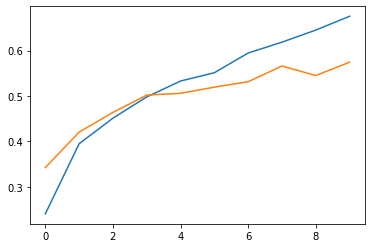

In [10]:
plt.plot(range(10), history.history['accuracy'])
plt.plot(range(10), history.history['val_accuracy'])
plt.show()

Izvršiti evaluaciju modela na skupu za testiranje.

In [11]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 1.1981 - accuracy: 0.5980


[1.1981101036071777, 0.5979999899864197]

Napraviti novi model koji ima istu arhitekturu kao prethodni, ali dodatno koristi regularizaciju izostavljanjem - ima $Dropout$ sloj sa faktorom $0.2$ posle svakog agregacionog sloja i između dva potpuno povezana sloja.

In [12]:
newModel = Sequential()

input_shape = X_train.shape[1:]

newModel.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
newModel.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
newModel.add(MaxPooling2D(pool_size=(2,2)))
newModel.add(Dropout(0.2))
newModel.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
newModel.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
newModel.add(MaxPooling2D(pool_size=(2,2)))
newModel.add(Dropout(0.2))
newModel.add(Flatten())
newModel.add(Dense(units=64, activation='relu'))
newModel.add(Dropout(0.2))
newModel.add(Dense(units=numClasses, activation='softmax'))          
          
newModel.summary()

newModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

Obučiti novi model sa istim parametrima kao kod starog modela.

In [13]:
newHistory = newModel.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
125/125 [==============================] - 5s 40ms/step - loss: 2.0983 - accuracy: 0.1990 - val_loss: 1.7823 - val_accuracy: 0.3140
Epoch 2/10
125/125 [==============================] - 5s 39ms/step - loss: 1.7003 - accuracy: 0.3679 - val_loss: 1.5457 - val_accuracy: 0.4270
Epoch 3/10
125/125 [==============================] - 5s 39ms/step - loss: 1.5566 - accuracy: 0.4286 - val_loss: 1.4509 - val_accuracy: 0.4560
Epoch 4/10
125/125 [==============================] - 5s 39ms/step - loss: 1.4430 - accuracy: 0.4748 - val_loss: 1.4083 - val_accuracy: 0.4705
Epoch 5/10
125/125 [==============================] - 5s 39ms/step - loss: 1.3620 - accuracy: 0.5088 - val_loss: 1.3054 - val_accuracy: 0.5210
Epoch 6/10
125/125 [==============================] - 5s 39ms/step - loss: 1.2814 - accuracy: 0.5337 - val_loss: 1.4382 - val_accuracy: 0.4775
Epoch 7/10
125/125 [==============================] - 5s 39ms/step - loss: 1.2514 - accuracy: 0.5495 - val_loss: 1.1884 - val_accuracy: 0.5520

Nacrtati oba grafika i za novi model.

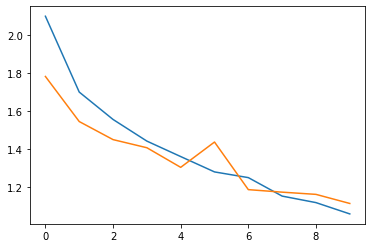

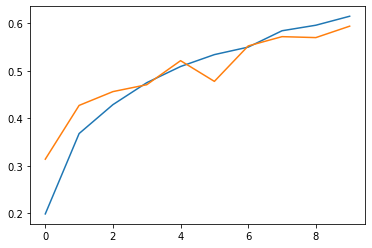

In [14]:
plt.plot(range(10), newHistory.history['loss'])
plt.plot(range(10), newHistory.history['val_loss'])
plt.show()

plt.plot(range(10), newHistory.history['accuracy'])
plt.plot(range(10), newHistory.history['val_accuracy'])
plt.show()

Da li poređenjem ova dva grafika sa prethodna dva možete da zaključite koji model se bolje ponaša i zašto?

In [ ]:
# deluju mi relativno slicno